# Лабораторная работа №1 - "Градиентный спуск и его модификации"

1) Выбрать тестовые функции оптимизации (2 шт)\
2)  Запрограммировать собственнуб реализацию классического градиентного спуска\
3)  Запрограммировать пайлайн тестирования алгоритма оптимизации
  * Визуализации функции и точки оптимума
  * Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
  * Визуализации точки найденного решения (можно добавить анимацию на плюс балл)

4) Запрограммировать метод вычисления градиента
  * Передача функции градиента от пользователя
  * Символьное вычисление градиента (например с помощью sympy) (на доп балл)
  * Численная аппроксимация градиента (на доп балл)

5) Запрограммировать одну моментную модификацию и протестировать ее\
6) Запрограммировать одну адаптивную модификацию и протестировать ее\
7) Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

In [ ]:
def Booth(x: np.array):
  return (x[0] + 2 * x[1] - 7)**2 + (2 * x[0] + x[1] - 5)**2

def Booth_grad(x: np.array):
  return np.array([2 * (x[0] + 2 * x[1] - 7) + 4 *(2 * x[0] + x[1] - 5),
                  4 * (x[0] + 2 * x[1] - 7) + 2 * (2 * x[0] + x[1] - 5)])


def Him(x: np.array):
  return (x[0] * x[0] + x[1] - 11) ** 2 + (x[0] + x[1] * x[1] - 7) ** 2

def Him_grad(x: np.array):
  return np.array([4 * x[0] * (x[0] * x[0] + x[1] - 11) + 2 * (x[0] + x[1] * x[1] - 7), 4 * x[1] * (x[1] * x[1] + x[0] - 7) + 2 * (x[1] + x[0] * x[0] - 11)])

## Визуализация

In [ ]:
def visualize(f: callable, bounds: np.array, history: np.array, glob_min: np.array, title: str, view_pos: tuple):
  fig = plt.figure(figsize = (10, 10))
  ax = plt.axes(projection='3d')
  x = np.linspace(bounds[0, 0], bounds[1, 0], 100)
  y = np.linspace(bounds[0, 1], bounds[1, 1], 100)
  x, y = np.meshgrid(x, y)
  z = f(np.array([x, y]))
  ax.plot_surface(x, y, z, cmap='cool', edgecolor='none', alpha=0.6)
  ax.view_init(*view_pos)
  ax.plot(history[:, 0], history[:, 1], history[:, 2], '-', c='black', alpha = 1)
  ax.scatter(history[0, 0], history[0, 1], history[0, 2], linewidths  = 1, color='blue', alpha = 1, label='Начальная точка')
  ax.scatter(glob_min[0], glob_min[1], glob_min[2], linewidths = 1, s=250,  color='white', lw=2, ec='black', alpha = 0.6, marker = '^', label='Глобальный минимум')
  ax.scatter(history[-1, 0], history[-1, 1], history[-1, 2], linewidths = 1, color='red', alpha = 1, label='найденный минимум')
  ax.legend(fontsize=12, loc='lower right')
  ax.set_title(title)
  ax.set_xlabel('x', fontsize=12)
  ax.set_ylabel('y', fontsize=12)
  ax.set_zlabel('z', fontsize=12)

  plt.show()

## Классический градиентный спуск

In [ ]:
def gradient_descent(func: callable, gradient: callable, start_position: np.array, lr: float, iter: int):

  """
  func - тестовая функция
  grad - градиент функции
  start_position - стартовая точка алгоритма
  lr - скорость обучения
  iter - количество итераций
  """

  history = []
  history.append(np.array([start_position[0].copy(), start_position[1].copy(), func(start_position)]))
  pos = start_position.copy()

  for i in range(iter):
    pos = pos - lr * gradient(pos)
    history.append(np.array([pos[0], pos[1], func(pos)]))

  return pos[0], pos[1], func(pos), np.array(history)

Начальная точка [10 10]
Найденный минимум 1 3
Значение в точке глобального минимума 3.37e-09


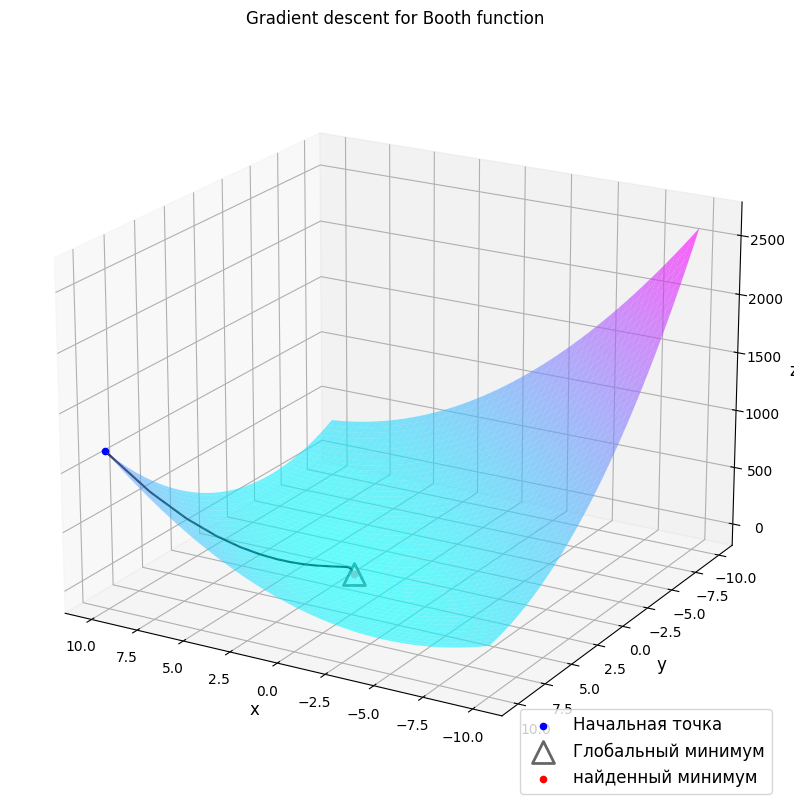

In [ ]:
start_point_Booth = np.array([10, 10])
bounds_Booth = np.array([[-10., -10.], [10., 10.]])
min_Booth = np.array([1., 3., 0.])

x0, y0, val, B1_history = gradient_descent(Booth, Booth_grad, start_point_Booth, 0.01, 500)
print('Начальная точка', start_point_Booth)
print('Найденный минимум', '{:.3g}'.format(x0), '{:.3g}'.format(y0))
print('Значение в точке глобального минимума', '{:.3g}'.format(val))
visualize(Booth, bounds_Booth, B1_history, min_Booth, 'Gradient descent for Booth function', (20, 120))

Начальная точка [5. 5.]
Найденный минимум 3 2
Значение в точке глобального минимума 7.35e-07


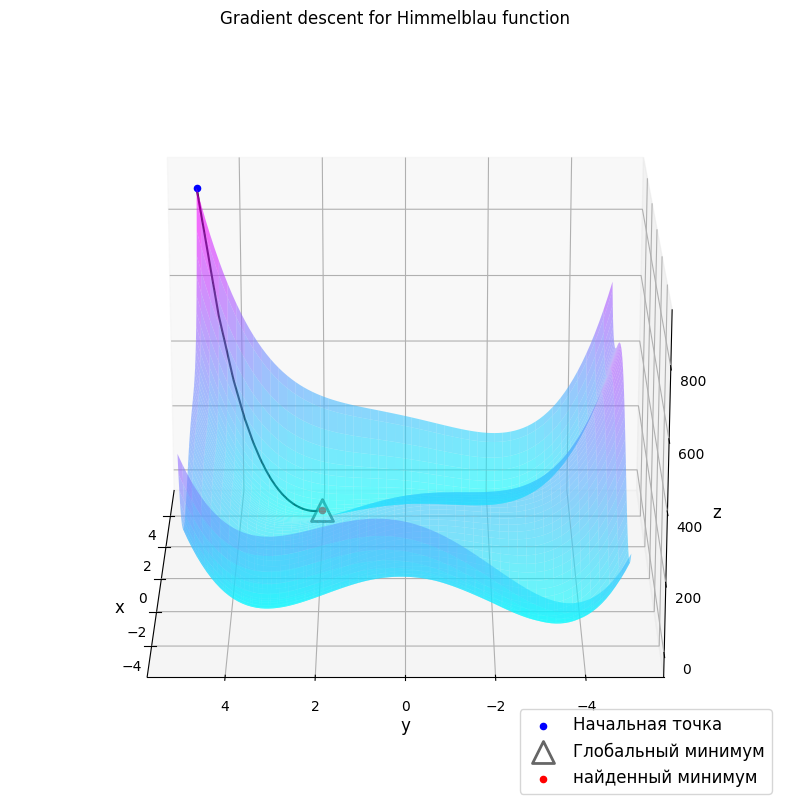

In [ ]:
start_point_Himm = np.array([5., 5.])
bounds_Him = np.array([[-5., -5.], [5., 5.]])
min_Him = np.array([3., 2., 0.])

x0, y0, val, H1_history = gradient_descent(Him, Him_grad, start_point_Himm, 0.001, 300)
print('Начальная точка', start_point_Himm)
print('Найденный минимум', '{:.3g}'.format(x0), '{:.3g}'.format(y0))
print('Значение в точке глобального минимума', '{:.3g}'.format(val))
visualize(Him, bounds_Him, H1_history, min_Him, 'Gradient descent for Himmelblau function', (20, 180))

## Моментная модификация градиентного спуска



In [ ]:
def moment_gd(func: callable, gradient: callable, start_position: np.array, lr: float, nu: float, iter: int):

  """
  func - тестовая функция
  grad - градиент функции
  start_position - стартовая точка алгоритма
  lr - скорость обучения
  nu - параметр
  iter - количество итераций
  """

  history = []
  history.append(np.array([start_position[0].copy(), start_position[1].copy(), func(start_position)]))
  pos= start_position.copy()
  v = start_position.copy()

  for i in range(iter):
    v =  nu * pos + (1 - nu) * gradient(pos)
    pos_prev = pos
    pos = pos - lr * v
    history.append(np.array([pos[0], pos[1], func(pos)]))

  return pos[0], pos[1], func(pos), np.array(history)

Начальная точка [10 10]
Найденный минимум 1.18 2.68
Значение в точке глобального минимума 0.217


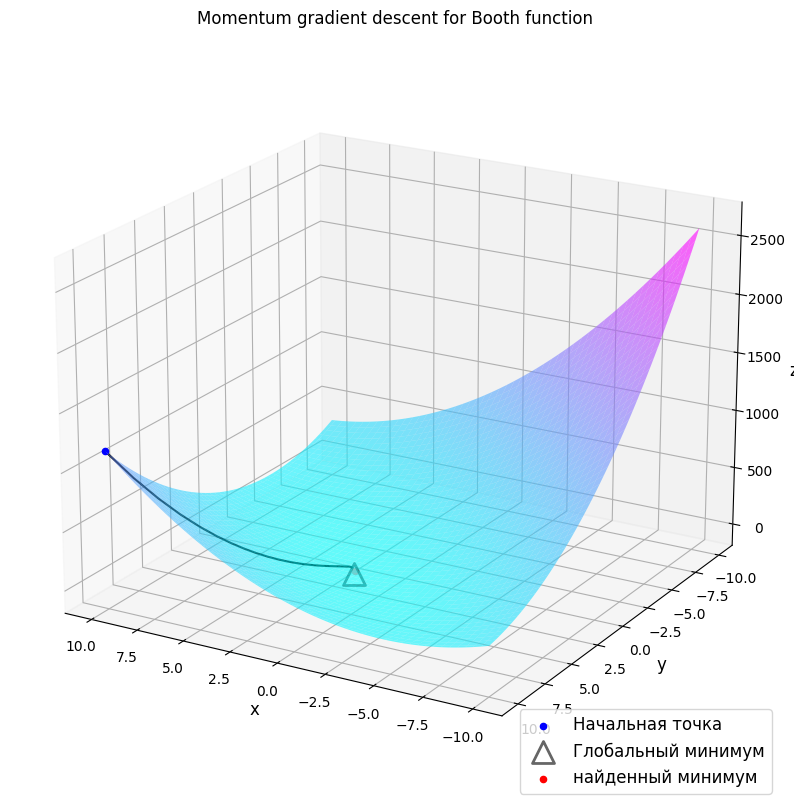

In [ ]:
x0, y0, val, B2_history = moment_gd(Booth, Booth_grad, start_point_Booth, 0.01, 0.4, 500)
print('Начальная точка', start_point_Booth)
print('Найденный минимум', '{:.3g}'.format(x0), '{:.3g}'.format(y0))
print('Значение в точке глобального минимума', '{:.3g}'.format(val))
visualize(Booth, bounds_Booth, B2_history, min_Booth, 'Momentum gradient descent for Booth function', (20, 120))

Начальная точка [5. 5.]
Найденный минимум 2.98 1.98
Значение в точке глобального минимума 0.0355


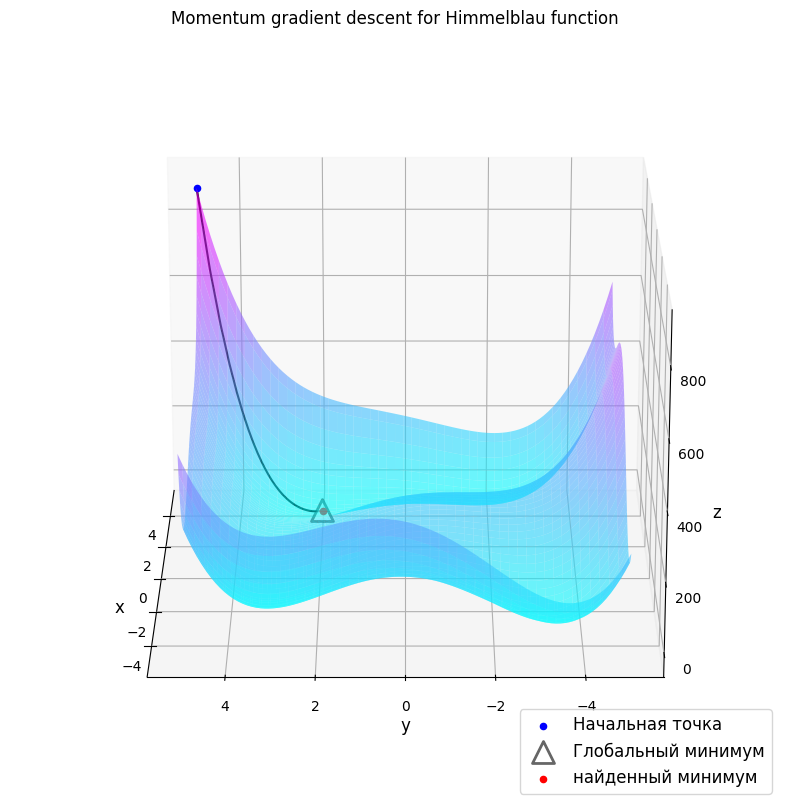

In [ ]:
x0, y0, val, H2_history = moment_gd(Him, Him_grad, start_point_Himm, 0.001, 0.4, 300)
print('Начальная точка', start_point_Himm)
print('Найденный минимум', '{:.3g}'.format(x0), '{:.3g}'.format(y0))
print('Значение в точке глобального минимума', '{:.3g}'.format(val))
visualize(Him, bounds_Him, H2_history, min_Him, 'Momentum gradient descent for Himmelblau function', (20, 180))

## Адаптивная модификация градиентного спуска (Adam)

In [ ]:
def adaptive_gd(func: callable, gradient: callable, start_position: np.array,
                lr: float, beta1: float, beta2: float, iter: int, eps=10e-8):
    """
    func - тестовая функция
    grad - градиент функции
    start_position - стартовая точка алгоритма
    lr - скорость обучения
    nu - параметр
    iter - количество итераций
    """

    history = []
    history.append(np.array([start_position[0].copy(), start_position[1].copy(), func(start_position)]))
    pos = start_position.copy()

    # инициализация моментов
    m = np.array([0, 0])
    v = np.array([0, 0])

    for i in range(iter):
      m = beta1 * m + (1 - beta1) * gradient(pos)
      v = beta2 * v + (1 - beta2) * gradient(pos) ** 2
      pos = pos - lr * m / (np.sqrt(v) + eps)
      history.append(np.array([pos[0], pos[1], func(pos)]))

    return pos[0], pos[1], func(pos), np.array(history)

Начальная точка [10 10]
Найденный минимум 1.01 3.01
Значение в точке глобального минимума 0.00202


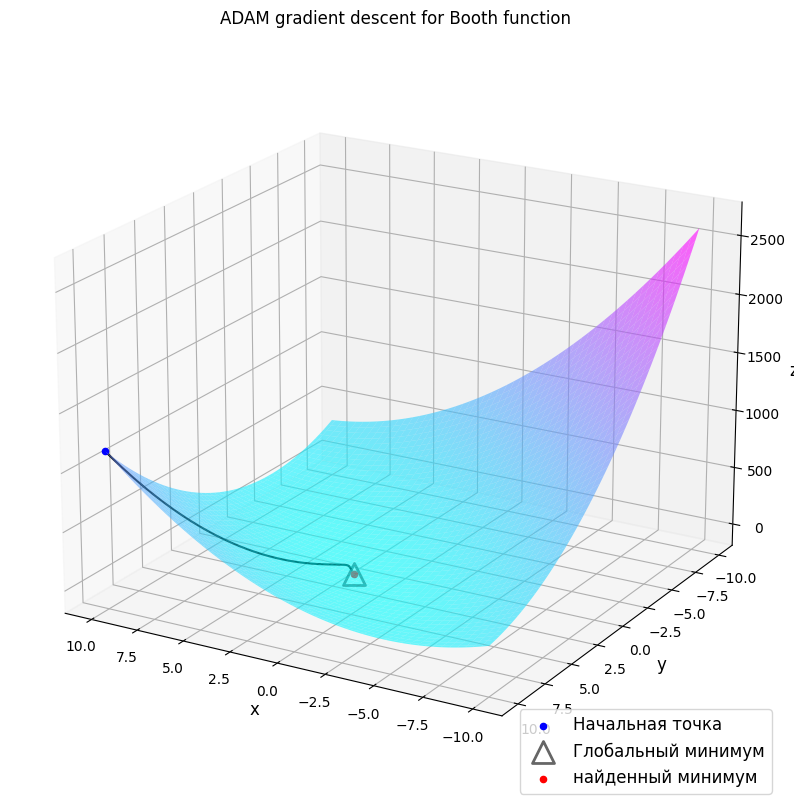

In [ ]:
x0, y0, val, B3_history = adaptive_gd(Booth, Booth_grad, start_point_Booth, 0.1, 0.6, 0.9, 500)
print('Начальная точка', start_point_Booth)
print('Найденный минимум', '{:.3g}'.format(x0), '{:.3g}'.format(y0))
print('Значение в точке глобального минимума', '{:.3g}'.format(val))
visualize(Booth, bounds_Booth, B3_history, min_Booth, 'ADAM gradient descent for Booth function', (20, 120))

Начальная точка [5. 5.]
Найденный минимум 2.99 2
Значение в точке глобального минимума 0.00142


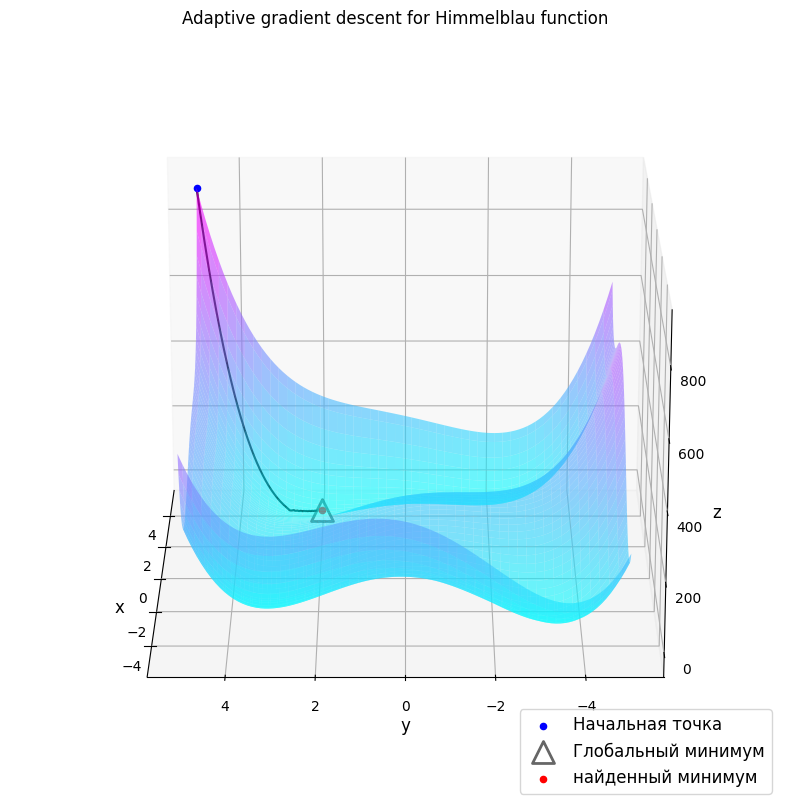

In [ ]:
x0, y0, val, H3_history = adaptive_gd(Him, Him_grad, start_point_Himm, 0.01, 0.6, 0.1, 300)
print('Начальная точка', start_point_Himm)
print('Найденный минимум', '{:.3g}'.format(x0), '{:.3g}'.format(y0))
print('Значение в точке глобального минимума', '{:.3g}'.format(val))
visualize(Him, bounds_Him, H3_history, min_Him, 'Adaptive gradient descent for Himmelblau function', (20, 180))

## Метод эволюции темпа обучения

In [ ]:
def evolution_lr_gd(func: callable, gradient: callable, start_position: np.array, lr: float, iter: int):
  """
  func - тестовая функция
  grad - градиент функции
  start_point - стартовая точка алгоритма
  lr - скорость обучения
  decay_rate - коэффициент затухания
  iter - количество итераций
  """

  history = []
  history.append(np.array([start_position[0].copy(), start_position[1].copy(), func(start_position)]))
  pos = start_position.copy()
  step = lr
  decay_rate = lr / iter

  for i in range(1, iter + 1):
    pos = pos - step * gradient(pos)
    history.append(np.array([pos[0], pos[1], func(pos)]))
    step *= (1. / (1. + decay_rate * i))

  return pos[0], pos[1], func(pos), np.array(history)

Начальная точка [10 10]
Найденный минимум 1 3
Значение в точке глобального минимума 3.29e-05


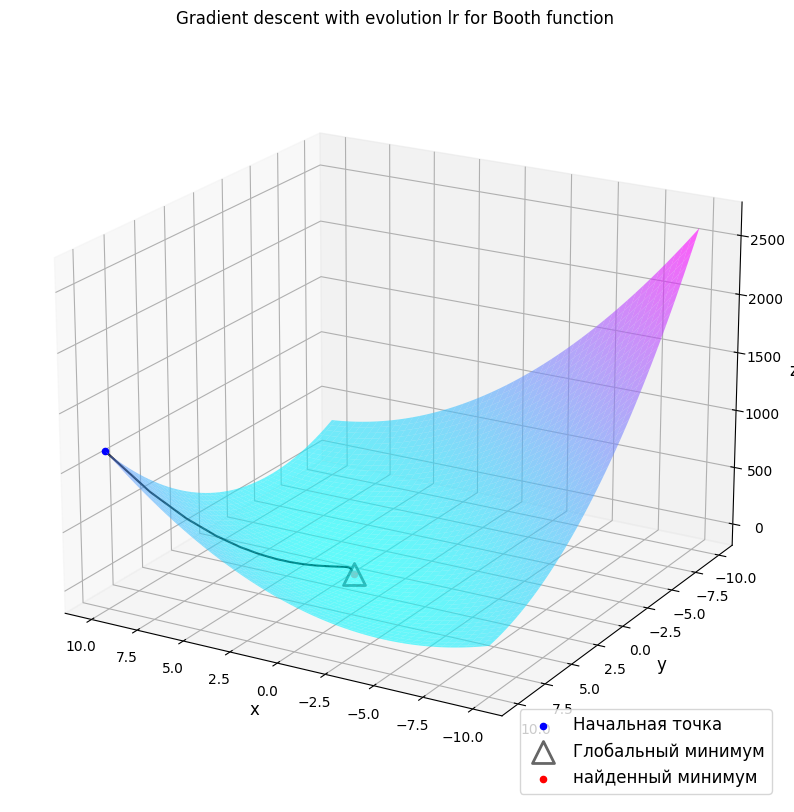

In [ ]:
x0, y0, val, B4_history = evolution_lr_gd(Booth, Booth_grad, start_point_Booth, 0.01, 500)
print('Начальная точка', start_point_Booth)
print('Найденный минимум', '{:.3g}'.format(x0), '{:.3g}'.format(y0))
print('Значение в точке глобального минимума', '{:.3g}'.format(val))
visualize(Booth, bounds_Booth, B4_history, min_Booth, 'Gradient descent with evolution lr for Booth function', (20, 120))

Начальная точка [5. 5.]
Найденный минимум 3 2
Значение в точке глобального минимума 1.57e-06


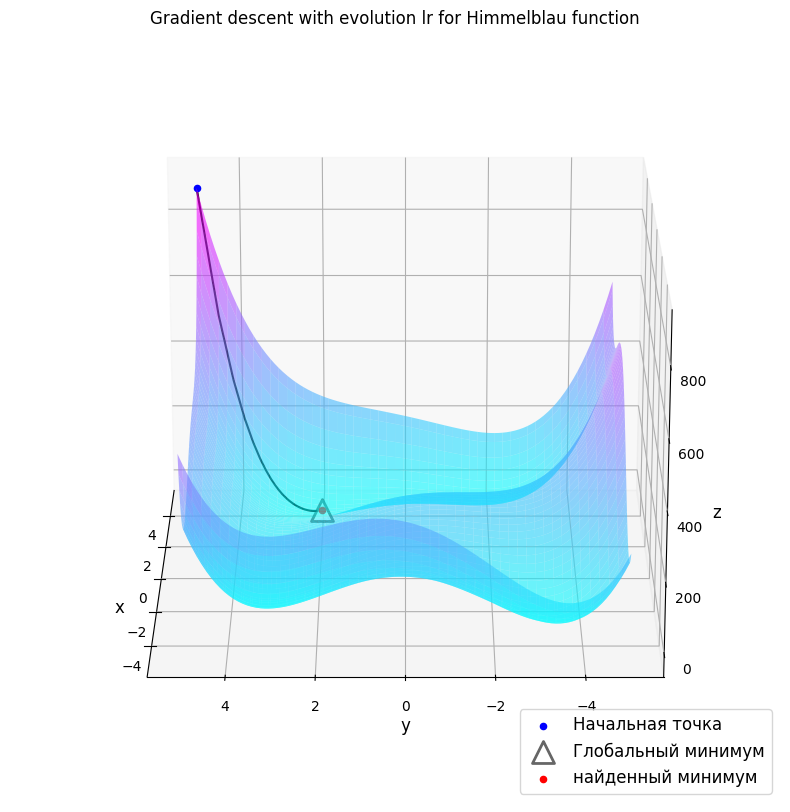

In [ ]:
x0, y0, val, H4_history = evolution_lr_gd(Him, Him_grad, start_point_Himm, 0.001, 300)
print('Начальная точка', start_point_Himm)
print('Найденный минимум', '{:.3g}'.format(x0), '{:.3g}'.format(y0))
print('Значение в точке глобального минимума', '{:.3g}'.format(val))
visualize(Him, bounds_Him, H4_history, min_Him, 'Gradient descent with evolution lr for Himmelblau function', (20, 180))

## Animation

In [ ]:
def animate(f, h1, h2, h3, h4, min, title):
  """
  f - функция
  h1 - история ГС
  h2 - история ГС с момент. модификацией
  h3 - история ГС с адапт. модификацией
  h4 - история ГС с эволюцией lr
  min - т минимума
  title - название
  """
  x = np.linspace(-10, 15, 100)
  y = np.linspace(-10, 15, 100)
  x, y = np.meshgrid(x, y)
  z = f(np.array([x, y]))

  fig, ax = plt.subplots(1, 1)
  ax.contour(x, y, z)
  x_min, y_min = min
  plt.xlim(-x_min-2, x_min+10)
  plt.ylim(-y_min-2, y_min+10)
  graph1, = plt.plot([], [], '1', c='black', label='Gradient dscent')
  graph2, = plt.plot([], [], 'd', c='purple', label='Momentum modification')
  graph3, = plt.plot([], [], 'x', c='c', label='Adaptive modification')
  graph4, = plt.plot([], [], 'p', c='orange', label='LR evolution')
  L = plt.legend(loc=2)
  plt.title(title)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  red_dot = plt.plot(x_min, y_min, 'X', lw = 1, color='white', mec='red', label='Глобальный минимум')
  plt.close()

  def animate(i):
      graph1.set_data([h1[i][0]], [h1[i][1]])
      graph2.set_data([h2[i][0]], [h2[i][1]])
      graph3.set_data([h3[i][0]], [h3[i][1]])
      graph4.set_data([h3[i][0]], [h4[i][1]])
      return graph2, graph2, graph3, graph4

  return FuncAnimation(fig, animate, frames=len(h2), interval=200, repeat=False)

In [ ]:
matplotlib.rcParams['animation.embed_limit'] = 2**128
ani1 = animate(Booth, B1_history, B2_history, B3_history, B4_history, (1, 3), title='Booth function')
HTML(ani1.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
matplotlib.rcParams['animation.embed_limit'] = 2**128
ani2 = animate(Him, H1_history, H2_history, H3_history, H4_history, (3, 2), title='Himmelblau function')
HTML(ani2.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.